## ML 2020 Ex3 Group 38 jupyter notebook

In [1]:
# run this to create train/test data split from raw data
# %run "prepare.py" 7 3

In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
%aimport networks
%aimport modules
%aimport modules_DAE
%aimport utils

In [17]:
from networks import SoftMax, MLP, DAELayer, DAESoftMax, ConvNet
from modules import buildModel, test, invertModel
from modules_DAE import buildDAELayer, buildDAESoftmaxModel, evaluateModel_DAE, testDAE, invertDAE

In [ ]:
# train first dae layer

buildDAELayer(DAELayer(10304, 1000), lRate=1e-4, epochs=5000, plot=True)

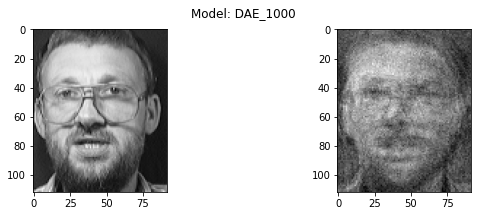

In [21]:
# evaluate outcome of first dae layer (needs a model in ./models/DAE_1000_model.pt)

layer_1 = DAELayer(10304, 1000)

evaluateModel_DAE(layer_1, 5)

In [ ]:
# train second dae layer with dae1000 preprocessed imgs

buildDAELayer(DAELayer(1000, 300), lRate=1e-4, epochs=5000, plot=True)

Starting at 23:44:40 to build DAE_300 model...
epoch: 100
epoch: 200
epoch: 300
epoch: 400
epoch: 500
epoch: 600
epoch: 700
epoch: 800
epoch: 900
epoch: 1000
epoch: 1100
epoch: 1200
epoch: 1300
epoch: 1400
epoch: 1500
epoch: 1600
epoch: 1700
epoch: 1800
epoch: 1900
epoch: 2000
epoch: 2100
epoch: 2200
epoch: 2300
epoch: 2400
epoch: 2500
epoch: 2600
epoch: 2700
epoch: 2800
epoch: 2900
epoch: 3000
epoch: 3100
epoch: 3200
epoch: 3300
epoch: 3400
epoch: 3500
epoch: 3600
epoch: 3700
epoch: 3800
epoch: 3900
epoch: 4000
epoch: 4100
epoch: 4200
epoch: 4300
epoch: 4400
epoch: 4500
epoch: 4600
epoch: 4700
epoch: 4800
epoch: 4900
epoch: 5000
Finished at 00:37:14, duration in sec: 3153


RuntimeError: shape '[112, 92]' is invalid for input of size 1000

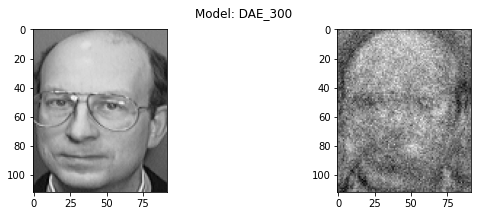

In [22]:
# evaluate outcome of second dae layer (needs a model in ./models/DAE_300_model.pt)

layer_2 = DAELayer(1000, 300)

evaluateModel_DAE(layer_2, 4)

In [ ]:
# train softmax with dae1000 and dae300 preprocessed imgs

buildDAESoftmaxModel(DAESoftMax(), lRate=1e-2, epochs=2000, plot=True)

In [14]:
testDAE(DAESoftMax())

Accuracy of the model  DAESoftMax  on the 120 test images: 2 %


Starting at 19:24:21 to invert DAESoftMax...
Finished at 19:24:23, duration in sec: 2


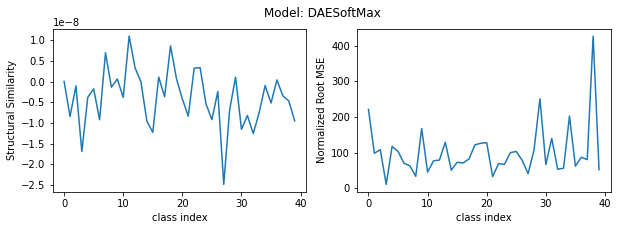

SSM: mean -3.89e-09, std 6.80e-09
NRMSE: mean 1.01e+02, std 7.18e+01


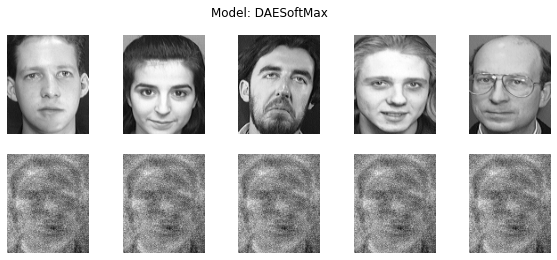

In [6]:
invertDAE(DAESoftMax(), lrMod=0.001, lrInv=0.001, nStep=40, processing=False, plot=True)

In [ ]:
invertDAE(DAESoftMax(), lrMod=0.001, lrInv=0.001, nStep=10, processing=True, plot=True)

In [ ]:
buildModel(SoftMax(), lRate=0.01, iCount=30, plot=True)

In [18]:
test(SoftMax())

Accuracy of the model  SoftMax  on the 120 test images: 1 %


Starting at 19:18:55 to invert SoftMax...
Finished at 19:19:02, duration in sec: 7


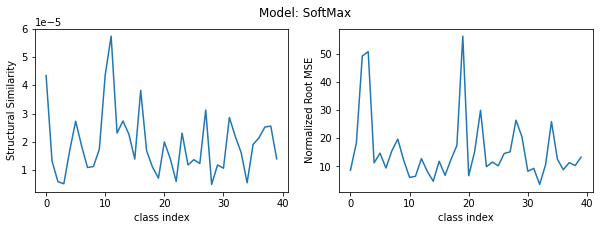

SSM: mean 1.92e-05, std 1.14e-05
NRMSE: mean 1.57e+01, std 1.19e+01


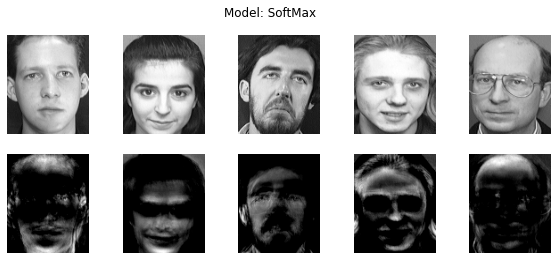

In [5]:
invertModel(SoftMax(), lrMod=0.001, lrInv=0.001, nStep=50, plot=True)

In [ ]:
buildModel(MLP(), 0.0001, 500, True)

In [19]:
test(MLP())

Accuracy of the model  MLP  on the 120 test images: 2 %


Starting at 19:10:04 to invert MLP...
Finished at 19:11:36, duration in sec: 91


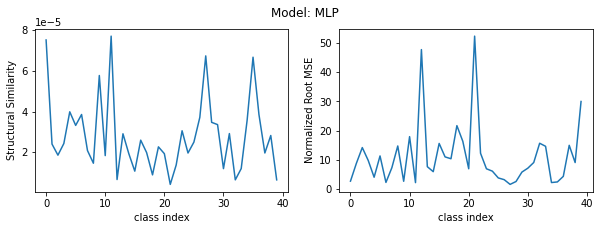

SSM: mean 2.82e-05, std 1.82e-05
NRMSE: mean 1.11e+01, std 1.08e+01


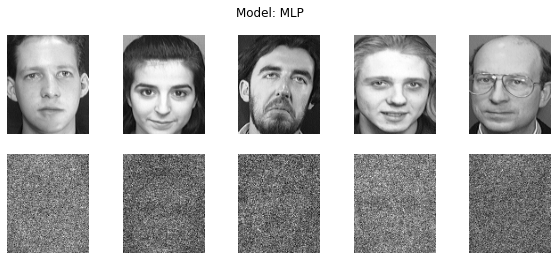

In [5]:
invertModel(MLP(), 0.0001, 0.01, 20, plot=True)

In [ ]:
buildModel(ConvNet(), 0.001, 50, True)

In [ ]:
invert(ConvNet(), 0.01, 0.01, 50, plot=True)